<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5 | Notebook 4: Modeling

### Carly Sharma, Jake Parker, & Adam Zucker

**CONTENTS:**
- Classification models based on our master dataframe, `true_df.csv`, and dummified master dataframe, `dummy_df.csv`. Models run:
    - Logistic Regression
    - $k$ Nearest Neighbors
    - Random Forest Classifier
    - Support Vector Classification
    - Convolutional Neural Network
<br>
<br>
- Data in our master dataframe was sourced from:
    - [Kaggle's](https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv) California Wildfire Incidents dataset
    - [NOAA](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00946/html) Meteorological data
    - Atmospheric carbon data collected by [NOAA/Mauna Loa Observatory](https://www.esrl.noaa.gov/gmd/dv/data/index.php?parameter_name=Carbon%2BDioxide&search=mauna+loa))

**BELOW:** Package and data imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
df = pd.read_csv('../data_clean/true_df.csv')
dummy_df = pd.read_csv('../data_clean/dummy_df.csv')

In [3]:
# Dropping unnecessary features from the master df
df = df.drop(columns=['highest_daily_snowfall', 'cooling_degree_days', 'admin_unit', 
                      'fire_name', 'extinguished', 'qc_flag'])

In [4]:
df.isnull().sum()

date                           0
county                         0
latitude                       0
longitude                      0
acres_burned                   0
fire_bins                      0
duration                       0
started                        0
major_incident                 0
avg_wind_speed                 0
avg_monthly_temp               0
extreme_max_temp               0
extreme_min_temp               0
total_monthly_precipitation    0
total_monthly_snowfall         0
dsnd                           0
dp10                           0
dt00                           0
dt32                           0
dx32                           0
dx70                           0
elevation                      0
co2_measured_mole_fraction     0
temp_range                     0
month                          0
season                         0
dtype: int64

In [5]:
dummy_df.dtypes.value_counts()

int64      69
float64    19
object      1
dtype: int64

---

In [7]:
# Defining X and y
X = dummy_df.drop(columns=['date', 'fire_bins'])
y = dummy_df['fire_bins']

# Instantiating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

# Scaling data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

**Baseline accuracy:**

In [8]:
y.value_counts(normalize=True)

1    0.389195
6    0.164278
3    0.160970
2    0.155458
4    0.078280
5    0.051819
Name: fire_bins, dtype: float64

### Logistic Regression

In [24]:
#Log Reggresion 
log = LogisticRegression(n_jobs=8)
log_params = {
    'fit_intercept' : [True,False],
    'max_iter' : [100, 250, 500, 1000]
}

logistic_model_gridsearch = GridSearchCV(log, log_params, cv = 5)

logistic_model_gridsearch.fit(X_train, y_train)

print(f'Best Parameters         = {logistic_model_gridsearch.best_params_}')
print(f'Best Estimator to use   = {logistic_model_gridsearch.best_estimator_}')
print(f'Best cross-value score  = {logistic_model_gridsearch.best_score_}')
print(f'R^2 for Testing Date    = {logistic_model_gridsearch.score(X_train,y_train)}')
print(f'R^2 for Testing Date    = {logistic_model_gridsearch.score(X_test,y_test)}')

logistic_model_gridsearch.fit(X_train_sc, y_train)

print(f'Best cross-value score Scaled = {logistic_model_gridsearch.best_score_}')
print(f'R^2 for Testing Date Scaled   = {logistic_model_gridsearch.score(X_train_sc,y_train)}')
print(f'R^2 for Testing Date Scaled   = {logistic_model_gridsearch.score(X_test_sc,y_test)}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters         = {'fit_intercept': False, 'max_iter': 100, 'n_jobs': 3}
Best Estimator to use   = LogisticRegression(fit_intercept=False, n_jobs=3)
Best cross-value score  = 0.9806896551724137
R^2 for Testing Date  = 0.9972413793103448
R^2 for Testing Date  = 0.989010989010989
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best cross-value score Scaled = 0.4027586206896552
R^2 for Testing Date Scaled = 0.5558620689655173
R^2 for Testing Date Scaled = 0.42857142857142855


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished


---
---
### $k$ Nearest Neighbors

In [ ]:
n_neightbors = [x for x in range(5,20,1)]
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors' : n_neightbors,
    'weights' : ['uniform','distance'],
    'n_jobs' : [3],
    'p' : [1,2],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size' : [2,4,6,8,10,12]
}

knn_gridsearch = GridSearchCV(knn, param_grid=knn_params, cv=5, verbose = 1)

knn_gridsearch.fit(X_train_sc,y_train)

print(f'Best Parameters: {knn_gridsearch.best_params_}')
print(f'Best Estimator to use: {knn_gridsearch.best_estimator_}')
print(f'Best Cross-Value Score Scaled: {knn_gridsearch.best_score_}')
print(f'R**2 for Training Date Scaled: {knn_gridsearch.score(X_train_sc,y_train)}')
print(f'R**2 for Testing DateScaled: {knn_gridsearch.score(X_test_sc,y_test)}')

---
---
### Random Forest

---

*Fitting to scaled X data*

In [9]:
# Instantiating random forest model
rf = RandomForestClassifier(n_jobs=8)

# Defining params to test in our RF model
rf_params = {
    'n_estimators': [5, 10, 25, 50],
    'max_depth': [3, 5, 7, 15],
    'max_features': [None, 'auto', 'log2'],
    'ccp_alpha': [0, 0.01, 0.1]
}

# Instantiating a gridsearch
rf_gs = GridSearchCV(rf, param_grid=rf_params, cv = 5)

# Fitting RF model on scaled data
rf_gs.fit(X_train_sc, y_train)

print(f'Best Params       = {rf_gs.best_params_}')
print(f'Best Score        = {rf_gs.best_score_}')
print(f'Training Accuracy = {rf_gs.score(X_train_sc, y_train)}')
print(f'Testing Accuracy  = {rf_gs.score(X_test_sc, y_test)}')

Best Params       = {'ccp_alpha': 0, 'max_depth': 5, 'max_features': None, 'n_estimators': 5}
Best Score        = 0.9986206896551725
Training Accuracy = 1.0
Testing Accuracy  = 1.0


In [10]:
rf_preds_train = rf_gs.predict(X_train_sc)
rf_preds_test = rf_gs.predict(X_test_sc)

In [11]:
# f1_rf_train = metrics.f1_score(y_train, rf_preds_train)
# f1_rf_test = metrics.f1_score(y_test, rf_preds_test)
# print('Random Forest Training F1       = ', f1_rf_train)
# print('Random Forest Testing F1        = ', f1_rf_test)

*Fitting to unscaled X data*

In [12]:
rf = RandomForestClassifier(n_jobs=8)

rf_params = {
    'n_estimators': [25, 50, 75, 100],
    'max_depth': [3, 5, 7, 15],
    'max_features': [None, 'auto', 'log2'],
    'ccp_alpha': [0, 0.01, 0.1]
}

rf_gs_us = GridSearchCV(rf, param_grid=rf_params, cv = 5)

# Fitting RF model on unscaled data
rf_gs_us.fit(X_train, y_train)

print(f'Best Params       = {rf_gs_us.best_params_}')
print(f'Best Score        = {rf_gs_us.best_score_}')
print(f'Training Accuracy = {rf_gs_us.score(X_train, y_train)}')
print(f'Testing Accuracy  = {rf_gs_us.score(X_test, y_test)}')

Best Params       = {'ccp_alpha': 0, 'max_depth': 5, 'max_features': None, 'n_estimators': 25}
Best Score        = 0.9986206896551725
Training Accuracy = 1.0
Testing Accuracy  = 1.0


In [13]:
rf_us_preds_train = rf_gs_us.predict(X_train)
rf_us_preds_test = rf_gs_us.predict(X_test)

In [14]:
# # Calculating F1 score for random forest classification model
# f1_rf_us_train = f1_score(y_train, rf_us_preds_train)
# f1_rf_us_test = f1_score(y_test, rf_us_preds_test)
# print('Random Forest Training F1       = ', f1_rf_us_train)
# print('Random Forest Testing F1        = ', f1_rf_us_test)

---
---
### Support Vector Classification

In [15]:
# Instantiating SVM.
svc = SVC()

svc_params = {
    'C':np.linspace(0, 5, 20),
    'kernel':['linear', 'rbf', 'polynomial', 'sigmoid'],
    'degree':[1, 2, 3]
}

svc_gs = GridSearchCV(estimator=svc, param_grid=svc_params, cv=5, n_jobs=4)

# Fitting RF model on scaled data
svc_gs.fit(X_train_sc, y_train)

print(f'Best Params       = {svc_gs.best_params_}')
print(f'Best Score        = {svc_gs.best_score_}')
print(f'Training Accuracy = {svc_gs.score(X_train_sc, y_train)}')
print(f'Testing Accuracy  = {svc_gs.score(X_test_sc, y_test)}')

Best Params       = {'C': 4.7368421052631575, 'degree': 1, 'kernel': 'linear'}
Best Score        = 0.4206896551724138
Training Accuracy = 0.5793103448275863
Testing Accuracy  = 0.43956043956043955


In [16]:
svc_preds_train = svc_gs.predict(X_train_sc)
svc_preds_test = svc_gs.predict(X_test_sc)

In [17]:
# f1_svc_train = f1_score(y_train, svc_preds_train)
# f1_svc_test = f1_score(y_test, svc_preds_test)
# print('SVC Training F1       = ', f1_svc_train)
# print('SVC Testing F1        = ', f1_svc_test)

---
---
### Convolutional Neural Network

In [18]:
nn = Sequential()

# Input and first hidden layer
nn.add(Dense(128, input_shape=(X_train_sc.shape[1],), activation='relu'))

# Hidden layers
nn.add(Dense(64, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(16, activation='relu'))

# Output layer
nn.add(Dense(6, activation='softmax'))

nn.compile(loss='bce', optimizer='adam', metrics=['acc'])

es = EarlyStopping(patience=3)

# Defining history as fit NN model
hist = nn.fit(X_train_sc, y_train,
        validation_data=(X_test_sc, y_test),
        epochs=25,
        batch_size=256,
        callbacks=es,
        verbose=0)

In [19]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               11264     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1

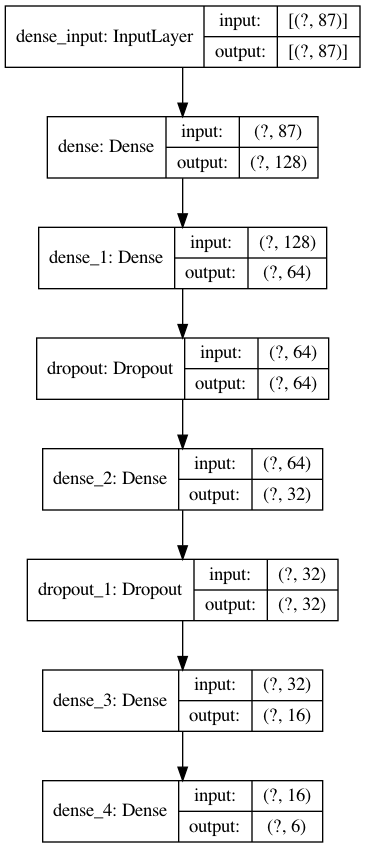

In [20]:
plot_model(nn, show_layer_names=True, show_shapes=True)

In [21]:
nn_preds = nn.predict(X_test_sc)

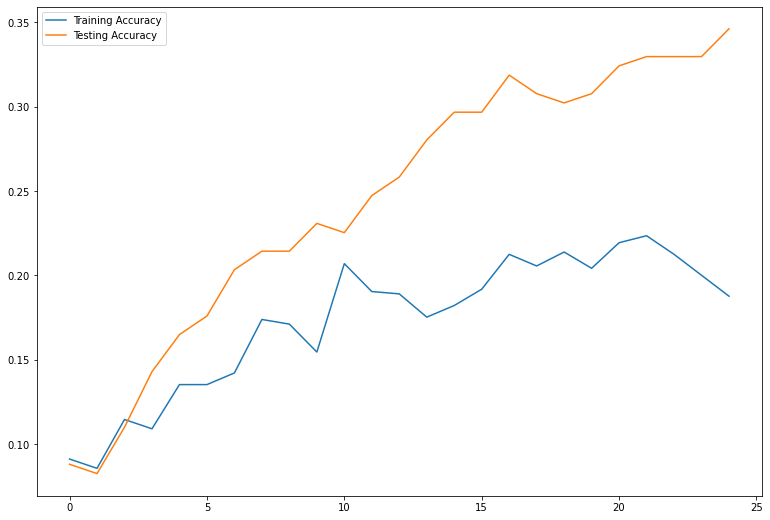

In [22]:
plt.figure(figsize=(13, 9))
plt.plot(hist.history['acc'], label = 'Training Accuracy')
plt.plot(hist.history['val_acc'], label = 'Testing Accuracy')
plt.legend();